In [14]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    mean_squared_error,
    r2_score
)

In [16]:
# Load the dataset
data = pd.read_csv('/content/computer.csv')

In [17]:
# Display basic information
print("Dataset Info:\n")
print(data.info())
print("\nFirst 5 Rows:\n", data.head())
print("\nMissing Values:\n", data.isnull().sum())
print("\nStatistical Summary:\n", data.describe(include='all'))

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5197 entries, 0 to 5196
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Brand               5197 non-null   object 
 1   Model               5197 non-null   object 
 2   CPU                 5197 non-null   object 
 3   RAM (GB)            5197 non-null   int64  
 4   Storage (GB)        5197 non-null   int64  
 5   GPU                 5197 non-null   object 
 6   Purpose             5197 non-null   object 
 7   Price ($)           5197 non-null   float64
 8   Screen (in)         5197 non-null   float64
 9   OS                  5197 non-null   object 
 10  Weight (kg)         5197 non-null   float64
 11  Battery Life (hrs)  5197 non-null   float64
 12  Release Year        5197 non-null   int64  
 13  Color               5197 non-null   object 
dtypes: float64(4), int64(3), object(7)
memory usage: 568.6+ KB
None

First 5 Rows:
        Br

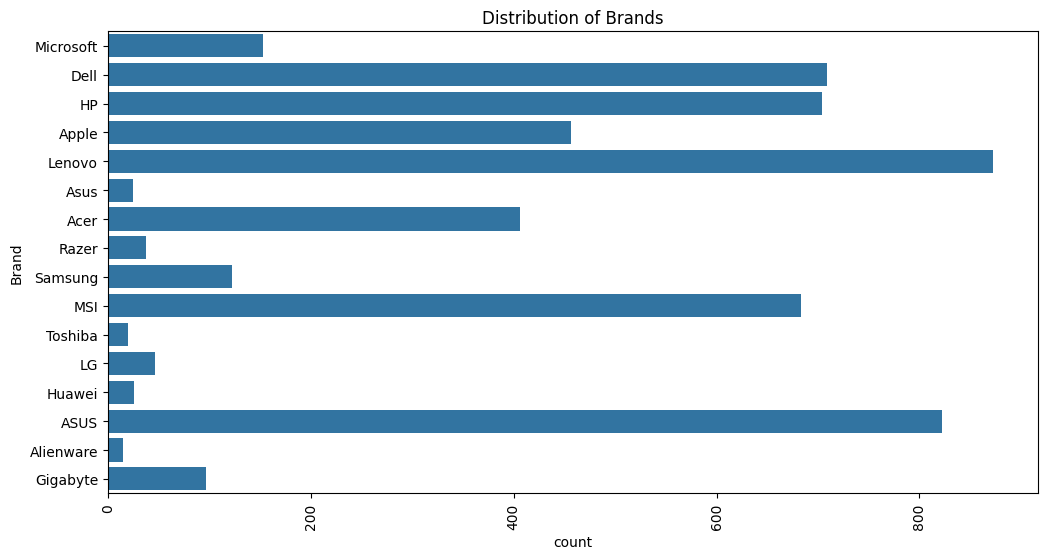

In [18]:
# Visualizations
plt.figure(figsize=(12, 6))
sns.countplot(data['Brand'])
plt.title("Distribution of Brands")
plt.xticks(rotation=90)
plt.show()

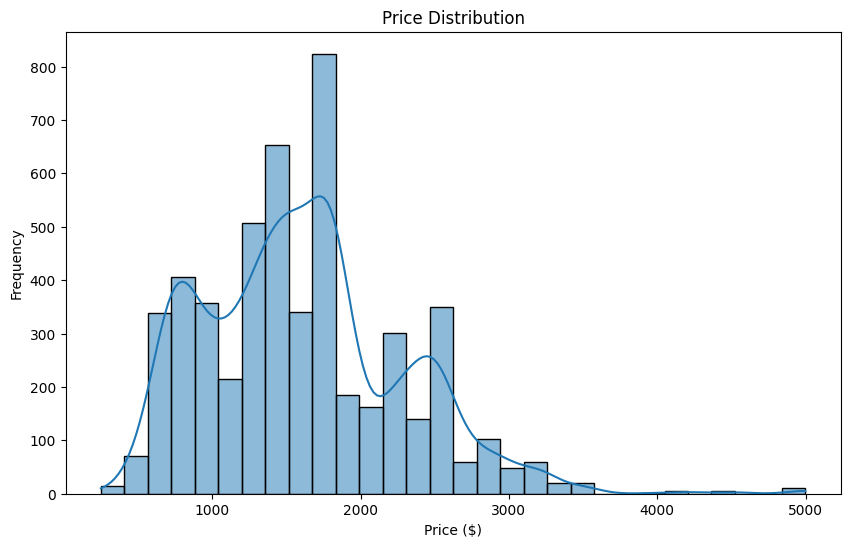

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Price ($)'], kde=True, bins=30)
plt.title("Price Distribution")
plt.xlabel("Price ($)")
plt.ylabel("Frequency")
plt.show()

In [20]:
label_encoders = {}
categorical_columns = ['Brand', 'Model', 'CPU', 'GPU', 'Purpose', 'OS', 'Color']
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [21]:
# Define features and targets
X = data[['Purpose', 'Price ($)']]
y = data.drop(['Purpose', 'Price ($)'], axis=1)

In [22]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [23]:
# Separate target columns by type
classification_targets = []
regression_targets = []

for column in y.columns:
    if pd.api.types.is_numeric_dtype(y[column]) and len(y[column].unique()) > 15:
        regression_targets.append(column)
    else:
        classification_targets.append(column)

In [24]:
# Train models
predictions = pd.DataFrame()
models = {}

# Classification Models
for column in classification_targets:
    print(f"\nTraining classification model for '{column}'...")
    clf = RandomForestClassifier(random_state=42, n_estimators=100)
    clf.fit(X_train, y_train[column])
    y_pred = clf.predict(X_test)
    predictions[column] = y_pred
    print(f"Accuracy for {column}: {accuracy_score(y_test[column], y_pred):.2f}")
    print(classification_report(y_test[column], y_pred, zero_division=0))
    models[column] = clf

# Regression Models
for column in regression_targets:
    print(f"\nTraining regression model for '{column}'...")
    reg = RandomForestRegressor(random_state=42, n_estimators=100)
    reg.fit(X_train, y_train[column])
    y_pred = reg.predict(X_test)
    predictions[column] = y_pred
    print(f"R² Score for {column}: {r2_score(y_test[column], y_pred):.2f}")
    print(f"RMSE for {column}: {np.sqrt(mean_squared_error(y_test[column], y_pred)):.2f}")
    models[column] = reg



Training classification model for 'RAM (GB)'...
Accuracy for RAM (GB): 0.88
              precision    recall  f1-score   support

           4       0.91      0.91      0.91        11
           8       0.89      0.85      0.87       292
          16       0.88      0.90      0.89       551
          32       0.85      0.88      0.87       173
          36       1.00      1.00      1.00         1
          64       0.91      0.83      0.87        12

    accuracy                           0.88      1040
   macro avg       0.91      0.90      0.90      1040
weighted avg       0.88      0.88      0.88      1040


Training classification model for 'Storage (GB)'...
Accuracy for Storage (GB): 0.84
              precision    recall  f1-score   support

          64       1.00      0.67      0.80         3
         128       0.67      0.80      0.73         5
         256       0.76      0.59      0.67       133
         512       0.88      0.94      0.91       695
        1000       0.79 

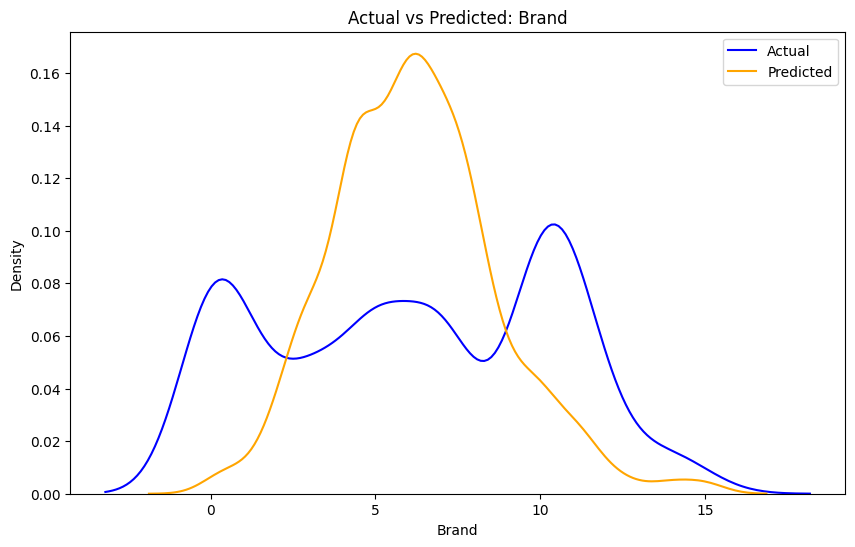

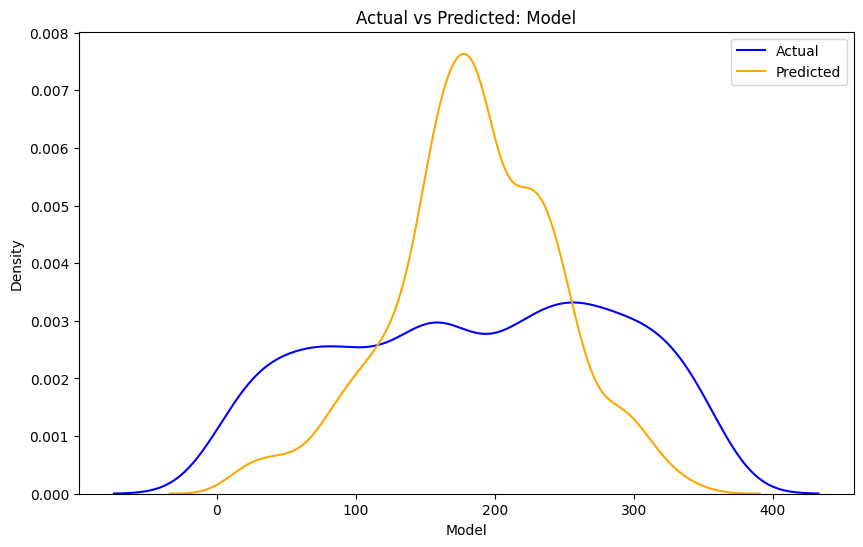

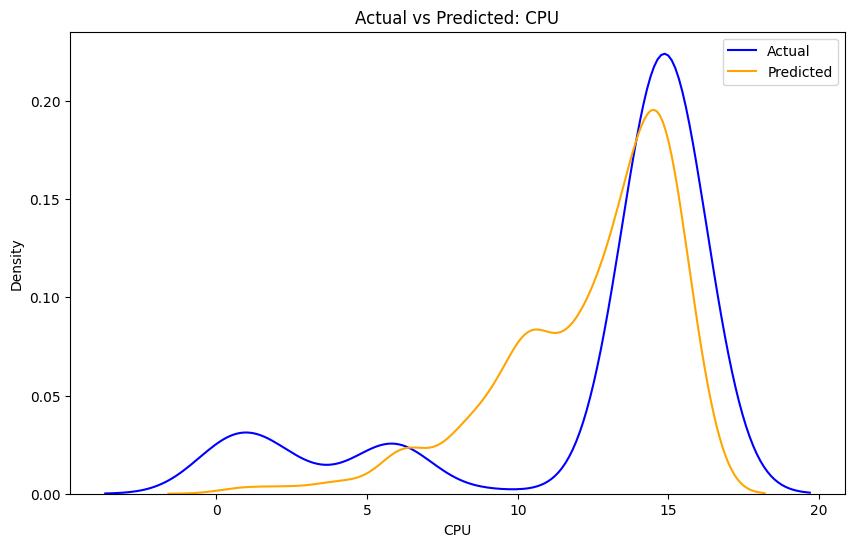

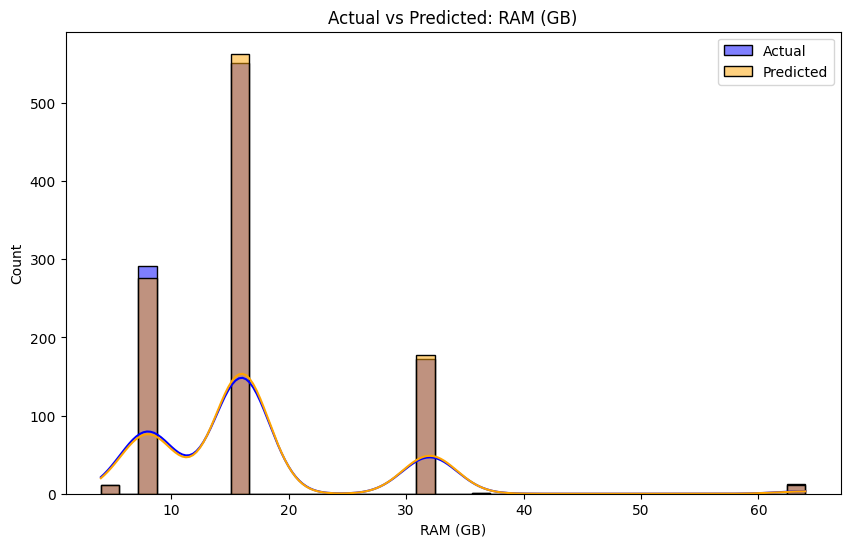

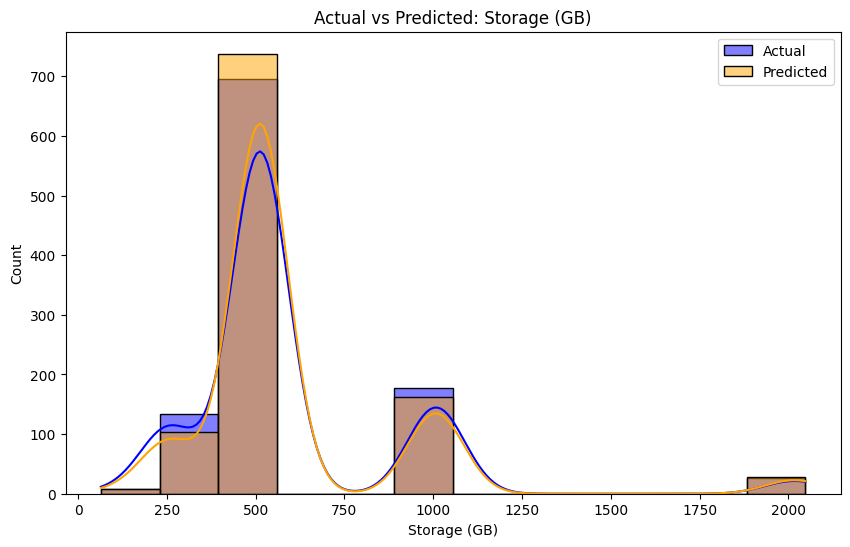

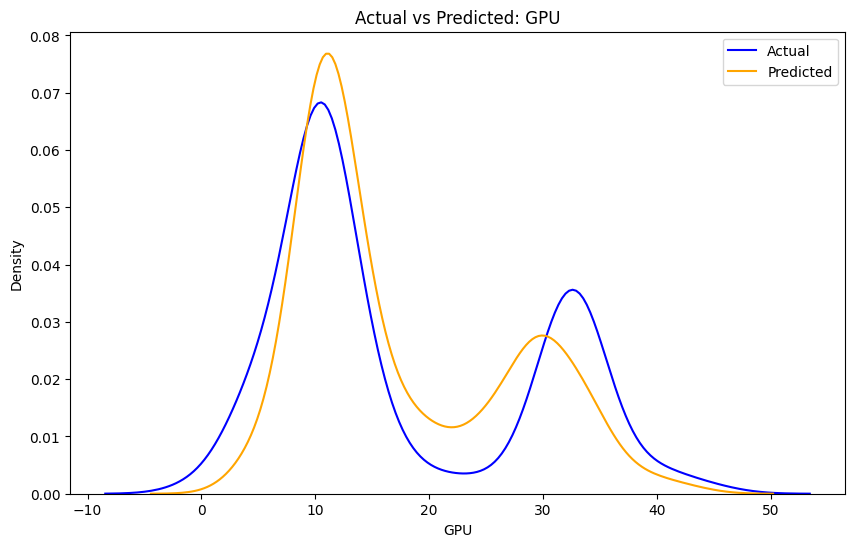

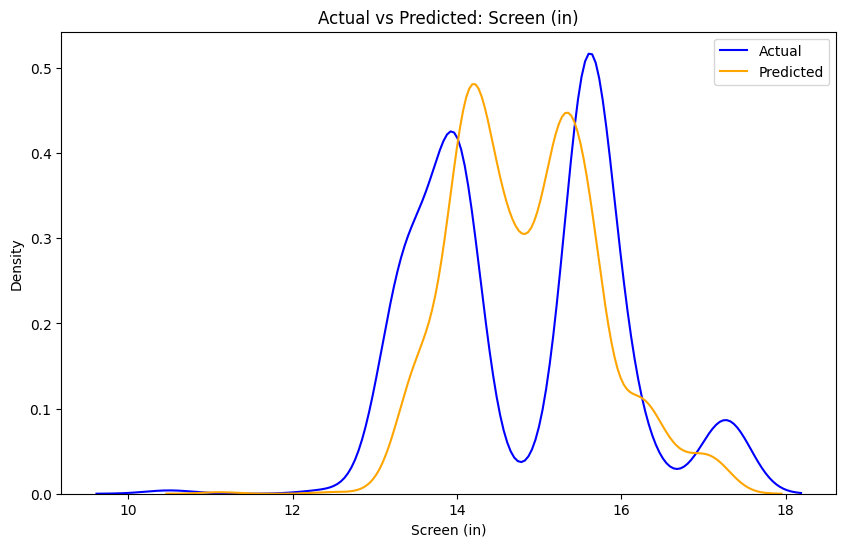

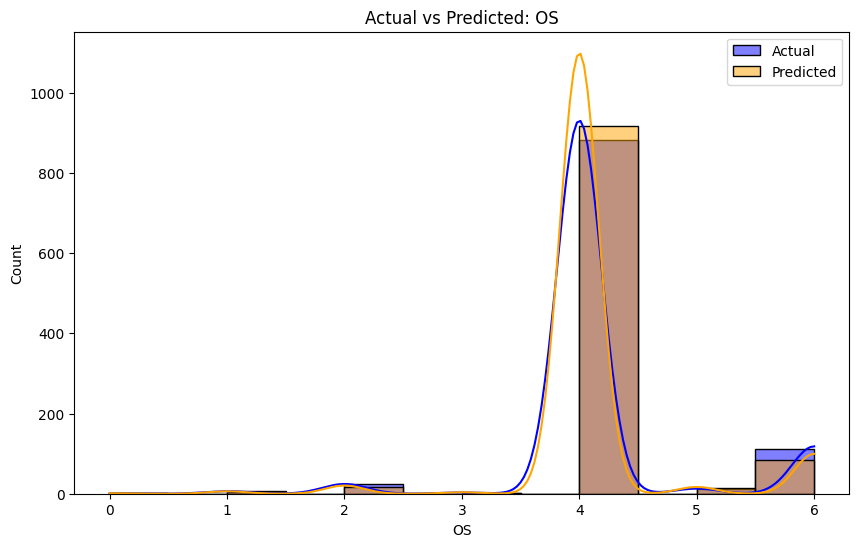

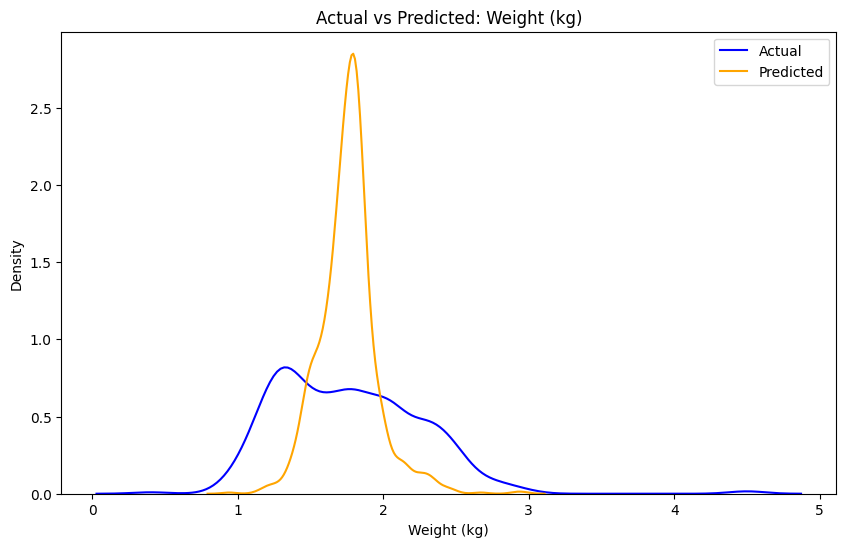

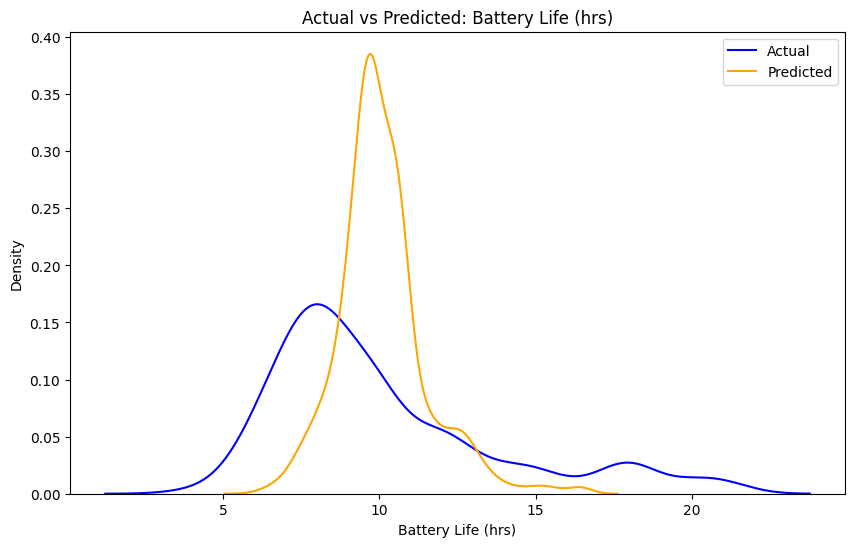

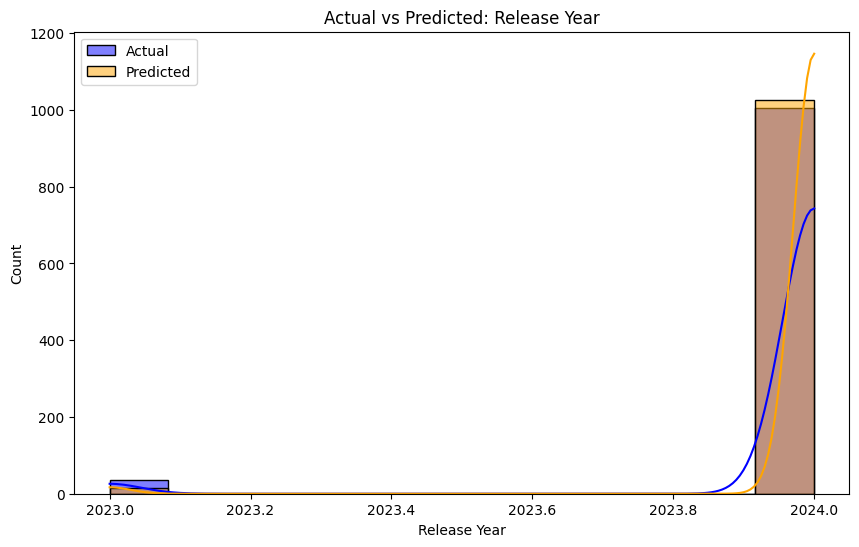

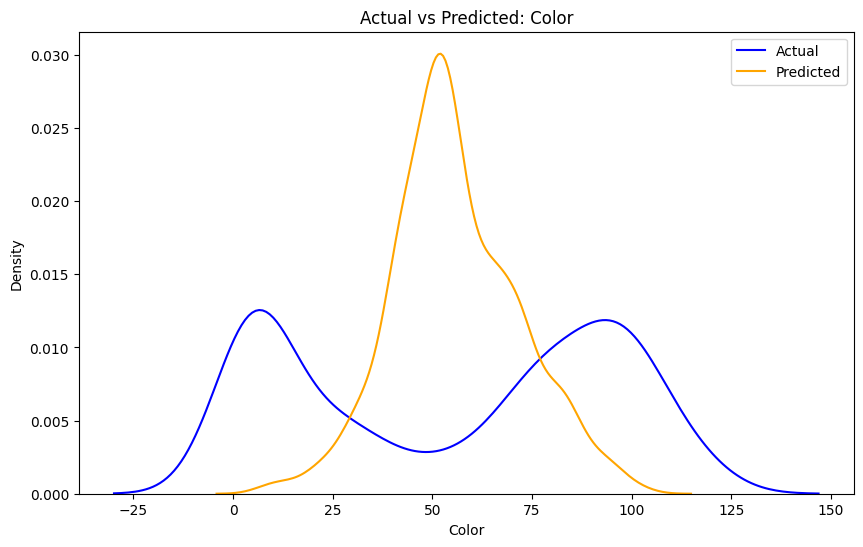

In [25]:
# Visual Comparison
predictions.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

for column in y.columns:
    plt.figure(figsize=(10, 6))
    if column in classification_targets:
        sns.histplot(y_test[column], color='blue', label='Actual', kde=True)
        sns.histplot(predictions[column], color='orange', label='Predicted', kde=True)
    else:
        sns.kdeplot(y_test[column], color='blue', label='Actual')
        sns.kdeplot(predictions[column], color='orange', label='Predicted')
    plt.title(f"Actual vs Predicted: {column}")
    plt.legend()
    plt.show()

In [26]:
# Save models and encoders
joblib.dump(models, 'laptop_models.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')

print("✅ All models and encoders saved successfully.")

✅ All models and encoders saved successfully.
